In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,254 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [ ]:
# 해양 쓰레기 모니터링
df20 = pd.read_csv("data/20181920.csv", encoding='cp949')
df20_sum = df20.sum()

sum_2018 = df20_sum[2]
sum_2019 = df20_sum[4]
sum_2020 = df20_sum[6]

In [ ]:
df21 = pd.read_csv("data/2021.csv", encoding='cp949')

sum_2021 = df21['2021개수'].apply(lambda x: float(x.replace("\"",""))).sum()

In [ ]:
df22 = pd.read_csv("data/2022.csv", encoding='cp949')
df22_sum = df22.sum()

sum_2022 = df22_sum[2]

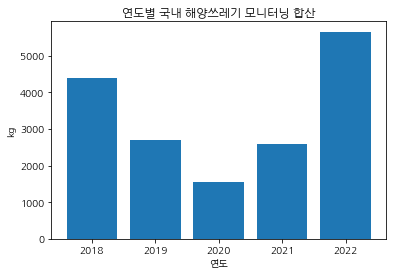

In [ ]:
# 시각화
x = ['2018', '2019', '2020', '2021', '2022']
y = [round(x) for x in [sum_2018, sum_2019, sum_2020, sum_2021, sum_2022]]

plt.rc('font', family='NanumGothic')

plt.bar(x,y)
plt.title("연도별 국내 해양쓰레기 모니터닝 합산")
plt.xlabel("연도")
plt.ylabel("kg")


# JSON으로 저장
j = json.dumps({"labels":x, "data":y})
with open("korea_sea_monitor.json","w") as f:
  f.write(j)

c:\Users\juni\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\juni\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\juni\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\juni\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\juni\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\juni\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46972 missing from current

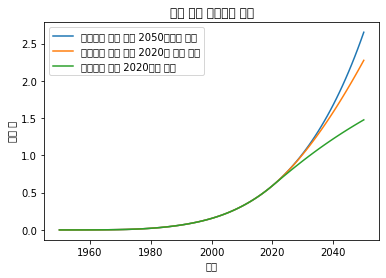

In [3]:
# 해양 미세 플라스틱

pl = pd.read_csv("data/microplastics-in-ocean.csv")
pl_g = pl[pl['Entity'] == 'Emissions growth to 2050']
pl_l = pl[pl['Entity'] == 'Emissions level to 2020']
pl_s = pl[pl['Entity'] == 'Emissions stop in 2020']

plt.plot(pl_g['Year'],pl_g['Accumulated ocean plastic: Microplastics (<0.5cm)']/1000000, label="플라스틱 배출 속도 2050년까지 증가")
plt.plot(pl_l['Year'],pl_l['Accumulated ocean plastic: Microplastics (<0.5cm)']/1000000, label="플라스틱 배출 속도 2020년 수준 유지")
plt.plot(pl_s['Year'],pl_s['Accumulated ocean plastic: Microplastics (<0.5cm)']/1000000, label="플라스틱 배출 2020년에 중지")
plt.title("해양 미세 플라스틱 무게")
plt.xlabel("연도")
plt.ylabel("백만 톤")
plt.legend()



# JSON으로 저장

microplastic = {
    "labels": list(map(int, list(pl_g['Year'].values))),
    "data1": list(map(int, list(pl_g['Accumulated ocean plastic: Microplastics (<0.5cm)'].values))),
    "data2": list(map(int, list(pl_l['Accumulated ocean plastic: Microplastics (<0.5cm)'].values))),
    "data3": list(map(int, list(pl_s['Accumulated ocean plastic: Microplastics (<0.5cm)'].values)))
}

j = json.dumps(microplastic)
with open("microplastic.json","w") as f:
  f.write(j)
